Visualizations


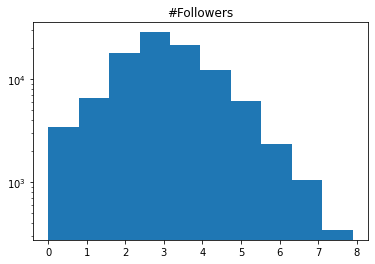

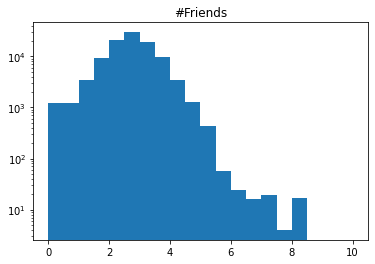

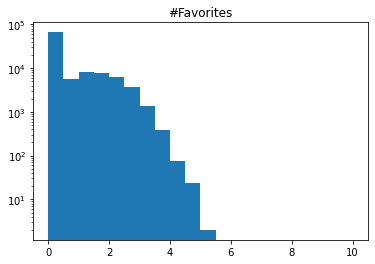

Correlation Matrix with respect to #Retweets
                    #Retweets
#Followers           0.134503
#Friends             0.026502
#Favorites           0.890328
Positive_sentiment   0.000433
Negative_sentiment  -0.010565
Hour_of_the_Post    -0.009850
#Mentions           -0.015828
#Hashtags           -0.002856
Least Squares Method Performance Metrics
MAE is 17.861671960362546
MSE is 11631.458344394678
R2 Score is 0.7986811923542654
             Features  Predictions
0          #Followers    -1.388267
1            #Friends     2.588393
2          #Favorites     5.117073
3  Positive_sentiment    22.364804
4  Negative_sentiment    -0.608888
5    Hour_of_the_Post    48.648459
6           #Mentions    -0.616327
7           #Hashtags    -0.165251
Ridge Regression Performance Metrics
MAE is 17.861663557212534
MSE is 11631.458344133955
R2 Score is 0.7986811923587781
             Features  Predictions
0          #Followers    -1.388247
1            #Friends     2.588398
2          #Favorites

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

"""
*** My Answers ***
Task 1:
    The 'Sentiment' feature is splited into 'Positive_sentiment' and 'Negative_sentiment' features by
    using String's split() function. 
    
    The specific hour of the post is extracted by converting the 'Timestamp' feature's type into
    'datetime64[ns]', and then the 'hour' attribute returns the hour information. Number of mentions
    and hashtags are calculated by replacing the null values, split the strings and count the
    length of the list.
    
    The missing values are filled by 0.

Task 2:
    The data of #Followers, #Friends, #Favorites are pre-processed by using the pd.log10() function, and then
    plotted as histograms. The correlation matrix between these variables are also produced using the build-
    in corr() function.
    
    These plots and correlation matrix signifies these findings:
        a. #Followers generally distribute in a range of 0 - 10^10, #Friends generally distribute in a range
        of 0 - 10^7, and #Favorites distribute in a range of 0 - 10^6.5.
        b. The features that are positively correlated with #Retweets are: #Favorites, Positive_sentiment,
        #Followers, and #Friends.
        c. The features that are negatively correlated with #Retweets are: #Mentions, Negative_sentiment,
        and Hour of the Post.
    
    If a feature shows 0 correlation to #Retweets, it does not always mean it could not contribute to predition.
    Sometimes, 0 correlation means there is no clustering or linear correlation, but it is still possible that
    the features have non-linear relationship like in a quadratic function. 
    
Task 3:
    The dataset was splited into train set (X_train & Y_train), and test set (X_test & Y_test).

Task 4:
    The regression models/methods I used here are Least Squares Method, Ridge Regression, Lasso Regression,
    and Decision Tree.
    
Task 5:
    I have conducted predictions using Least Squares Method, Ridge Regression, Lasso Regression, and Decision
    Tree on the test set (X_test).
    
Task 6:
    To compare the regression methods, the appropriate evaluation metrics are Mean Absolute Error (MAE), Mean
    Square Error (MSE), and R2 score. MAE indicates the average differences between the X_train and predicted
    values; MSE shows the squared differences between the X_train and predicted values; and R2 score shows the
    proportion of variance of the dependent variable (#Retweets) explained by the independent variables.
"""

df = pd.read_excel('hw2.xlsx')
df[['Positive_sentiment', 'Negative_sentiment']] = df['Sentiment'].str.split(' ', expand=True)
df[['Positive_sentiment', 'Negative_sentiment']] = df[['Positive_sentiment', 'Negative_sentiment']].fillna(0)
df['Positive_sentiment'] = df['Positive_sentiment'].astype('float')
df['Negative_sentiment'] = df['Negative_sentiment'].astype('float')
df['#Retweets'] = df['#Retweets'].astype('float')
df['#Friends'] = df['#Friends'].astype('float')
df['#Favorites'] = df['#Favorites'].astype('float')


df['Timestamp'] = df['Timestamp'].astype('datetime64[ns]')
df['Hour_of_the_Post'] = df['Timestamp'].dt.hour

df['Mentions'] = df['Mentions'].replace(to_replace='null;', value='')
df['#Mentions'] = df['Mentions'].str.split().str.len()
df['#Mentions'] = df['#Mentions'].fillna(0)
df['#Mentions'] = df['#Mentions'].astype('int')

df['Hashtags'] = df['Hashtags'].replace(to_replace='null;', value='')
df['#Hashtags'] = df['Hashtags'].str.split().str.len()
df['#Hashtags'] = df['#Hashtags'].fillna(0)
df['#Hashtags'] = df['#Hashtags'].astype('int')

print('Visualizations')
followers_log = np.log10(df['#Followers'], where=df['#Followers'] > 0)
plt.hist(followers_log, log=True)

plt.title('#Followers')
plt.show()

friends_log = np.log10(df['#Friends'], where=df['#Friends'] > 0)
plt.hist(friends_log, log=True, range=[0, 10], bins=20)
plt.title('#Friends')
plt.show()

favorites_log = np.log10(df['#Favorites'], where=df['#Favorites'] > 0)
plt.hist(favorites_log, log=True, range=[0, 10], bins=20)
plt.title('#Favorites')
plt.show()
print('======================================================')

print('Correlation Matrix with respect to #Retweets')
data = df.drop(['Tweet ID', 'Username', 'Timestamp', 'Entities',
               'Sentiment', 'Mentions', 'Hashtags', 'URLs', '#Retweets'], axis=1)

print(pd.DataFrame(data.corrwith(df['#Retweets'], method='pearson'), columns=['#Retweets']))
print('======================================================')

# Least Squares Method
X = df.drop(['Tweet ID', 'Username', 'Timestamp', 'Entities', 'Sentiment', 'Mentions', 'Hashtags', 'URLs', '#Retweets'], axis = 1)
X_train = X.iloc[:80001]
X_test = X.iloc[80001:100000]
Y_train = df['#Retweets'].iloc[:80001]
Y_test = df['#Retweets'].iloc[80001:100000]

lm = LinearRegression()
lm.fit(X_train, Y_train)

LSM_predicted = lm.predict(X_test)
LSM_MAE = metrics.mean_absolute_error(Y_test, LSM_predicted)
LSM_MSE = metrics.mean_squared_error(Y_test, LSM_predicted)
LSM_R2 = metrics.r2_score(Y_test, LSM_predicted)
print("Least Squares Method Performance Metrics")
print("MAE is {}".format(LSM_MAE))
print("MSE is {}".format(LSM_MSE))
print("R2 Score is {}".format(LSM_R2))
print(pd.DataFrame(zip(X_train.columns, LSM_predicted), columns=['Features', 'Predictions']))
print('======================================================')

# Ridge Regression
ridge_reg = linear_model.Ridge(alpha=0.5)
ridge_reg.fit(X_train, Y_train)
ridge_predicted = ridge_reg.predict(X_test)
ridge_MAE = metrics.mean_absolute_error(Y_test, ridge_predicted)
ridge_MSE = metrics.mean_squared_error(Y_test, ridge_predicted)
ridge_R2 = metrics.r2_score(Y_test, ridge_predicted)
print("Ridge Regression Performance Metrics")
print("MAE is {}".format(ridge_MAE))
print("MSE is {}".format(ridge_MSE))
print("R2 Score is {}".format(ridge_R2))
print(pd.DataFrame(zip(X_train.columns, ridge_predicted), columns=['Features', 'Predictions']))
print('======================================================')

# Lasso Regression
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(X_train, Y_train)
lasso_predicted = lasso_reg.predict(X_test)
lasso_MAE = metrics.mean_absolute_error(Y_test, lasso_predicted)
lasso_MSE = metrics.mean_squared_error(Y_test, lasso_predicted)
lasso_R2 = metrics.r2_score(Y_test, lasso_predicted)
print("Lasso Regression Performance Metrics")
print("MAE is {}".format(lasso_MAE))
print("MSE is {}".format(lasso_MSE))
print("R2 Score is {}".format(lasso_R2))
print(pd.DataFrame(zip(X_train.columns, lasso_predicted), columns=['Features', 'Predictions']))
print('======================================================')

# Decision Tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
clf_predicted = clf.predict(X_test)
clf_MAE = metrics.mean_absolute_error(Y_test, clf_predicted)
clf_MSE = metrics.mean_squared_error(Y_test, clf_predicted)
clf_R2 = metrics.r2_score(Y_test, clf_predicted)
print("Decision Tree Performance Metrics")
print("MAE is {}".format(clf_MAE))
print("MSE is {}".format(clf_MSE))
print("R2 Score is {}".format(clf_R2))
print(pd.DataFrame(zip(X_train.columns, clf_predicted), columns=['Features', 'Predictions']))